# Clase 4 - Solucionario

En este documento se encuentran soluciones propuestas para todos los desafíos y ejercicios de la Clase 4. Los problemas pueden ser resueltos de muchas maneras distintas por lo cual no se preocupen si las soluciones que proponen ustedes no son idénticas a las que les proponemos.

### Mini desafío 1

Gráficar en el intervalo de **[-5, 5]** una [función gaussiana](https://es.wikipedia.org/wiki/Funci%C3%B3n_gaussiana) definida como:

$$ f(x) = e^{-x^2/2} $$

Usar la funcion [np.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) de numpy.

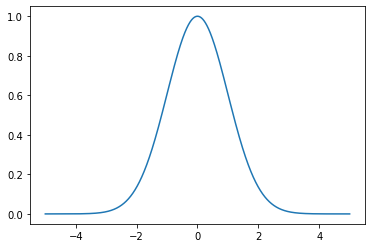

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-5,5,10000)
gaussiana = np.exp(-x**2/2)  # Expresión vectorizada, calcula el resultado uno a uno

plt.plot(x, gaussiana)
plt.show()


### Mini desafío 2.A

Se pide realizar un gráfico del valor del **Bitcoin** de los últimos 10 años, marcar con un punto el valor máximo del gráfico, calcular cuándo sucedió.

 **Nota:**  
 - Usen la función [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Un **.csv** es prácticamente idéntico a un **.xlsx**.
 - Los valores a graficar estan la columna "Open" (usando **to_dict("list"**) podrían resolver el problema).

 

In [ ]:
! wget  https://raw.githubusercontent.com/LedesmaFran/python/master/BTC.csv         #WARNING No tiene 10 Años

#Datos extraidos desde https://es.finance.yahoo.com/

El precio mas alto es: 19475.800781
Sucedio el dia: 2017-12-17


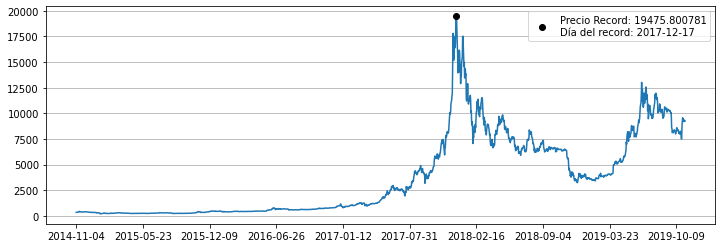

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import time

archivo = pd.read_csv("BTC.csv")
data = archivo.to_dict("list")
cant = len(data["Date"])
x = []
y = []

precio_mas_alto = 0
dia_del_record = ""

for i in range(cant):
  x.append(data["Date"][i])
  y.append(data["Open"][i])

  if y[i] > precio_mas_alto:
    precio_mas_alto = y[i]
    dia_del_record = x[i]

print("El precio mas alto es:", precio_mas_alto)
print("Sucedio el dia:", dia_del_record)
record_label = 'Precio Record: {}\nDía del record: {}'.format(precio_mas_alto, dia_del_record)

plt.figure(figsize=(12, 4))
plt.plot(x, y)
plt.plot(dia_del_record, precio_mas_alto, 'ko', label=record_label)
plt.xticks(x[ : :200]) # Mostrar una de cada 200 fechas
plt.grid( axis='y' )   # Mostrar una grilla horizontal
plt.legend()           # Mostrar labels
plt.show()

### Mini desafío 2.B - Challenge
Se pide realizar un gráfico de la cotización de las acciones diarias de las compañias **Amazon** y **Google** de los últimos 10 años. Encontrar los puntos donde se cruzan los dos gráficos y marcarlos con un punto. Usar dos tipos de línea distintos. 

**Nota:**  
 - Usen la función [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) Un **.csv** es prácticamente identico a un **.xlsx**.
 - Los valores a graficar estan la columna *Open* (usando **to_dict("list"**) podrían resolver el problema).

**Tip:** Ya que los gráficos son discretos, para detectar un cruce deberán revisar que la acción que es la más cara hoy sea la que era más barata ayer. Esto es porque sería muy raro que haya un día en el cual ambas acciones tengan *exactamente* el mismo precio. Para interpretar mejor este comentario pueden observar como en la siguiente imagen se producen 2 cruces, pero solamente en el primero el cruce es *exactamente* sobre el mismo valor:

<img src="https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/_assets/CruceDiscreto.png" width = 450>

In [ ]:
! wget  https://raw.githubusercontent.com/LedesmaFran/python/master/GOOGLE.csv
! wget  https://raw.githubusercontent.com/LedesmaFran/python/master/AMZN.csv

#Datos extraidos desde https://es.finance.yahoo.com/

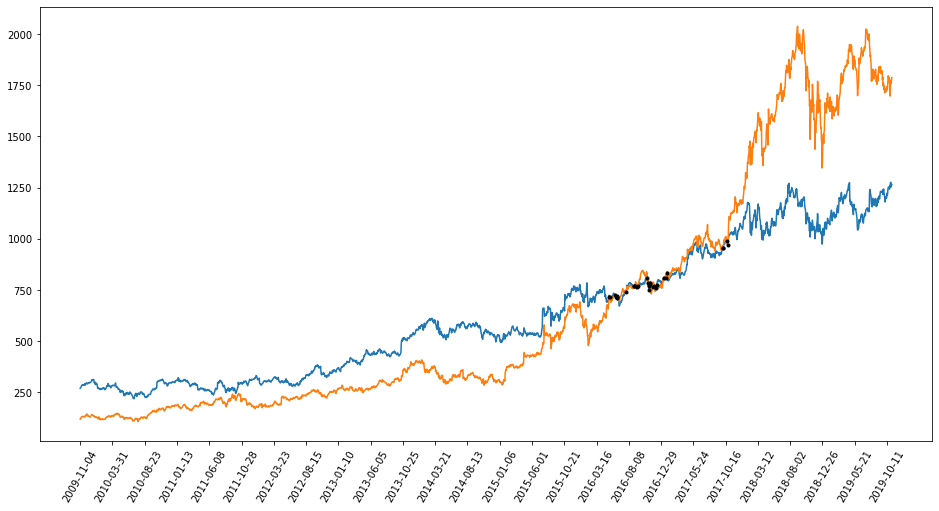

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

googlefile = pd.read_csv("GOOGLE.csv")
amazonfile = pd.read_csv("AMZN.csv")
google = googlefile.to_dict("list")
amazon = amazonfile.to_dict("list")

#print(google['Open'])
#print(amazon['Open'])

plt.figure(figsize=(16, 8))

#Empiezan con el valor del primer dia
gx = [google["Date"][0]]
gy = [google["Open"][0]]
ax = [amazon["Date"][0]]
ay = [amazon["Open"][0]]

crucex = []
crucey = []

for i in range(1, len(google["Date"])): #range empieza desde 1 en vez de 0
  gx.append(google["Date"][i])
  gy.append(google["Open"][i])
  ax.append(amazon["Date"][i])
  ay.append(amazon["Open"][i])

  # Condicional de cruce (son iguales o invirtieron su orden)
  if (ay[i] == gy[i]) or (ay[i] > gy[i] and ay[i-1] < gy[i-1]) or (ay[i] < gy[i] and ay[i-1] > gy[i-1]):
    crucex.append(gx[i])
    crucey.append(gy[i])

plt.plot(gx,gy)
plt.plot(ax,ay)
plt.plot(crucex,crucey, 'k.')
plt.xticks(gx[::100], rotation=60)

plt.show()

### Mini desafío 3

1. Visualizar usando un piechart la cuota de mercado de diferentes compañías que ofrecen un producto (por ejemplo: marcas de celulares).
2. Averiguar el color favorito de caramelos Sugus de diferentes amigos o conocidos y visualizar la información con un gráfico piechart, mostrando los colores de cada sección que corresponden al color de caramelo.

![sugus](https://drive.google.com/uc?id=1lGlGRF4DpV9WQIwe5fSeb8BQvtMC4IUL)

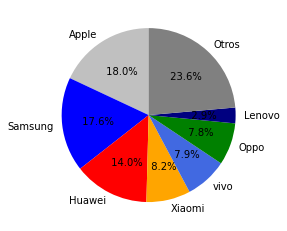

In [ ]:
# Parte 1

import matplotlib.pyplot as plt

labels = ('Apple', 'Samsung', 'Huawei', 'Xiaomi', 'vivo', 'Oppo', 'Lenovo', 'Otros')
sizes = [72.3, 70.4, 56.2, 32.9, 31.5, 31.4, 11.7, 94.7] #Millones de unidades: 2019 Q4
colors = ['silver', 'blue', 'red', 'orange', 'royalblue', 'green', 'navy', 'grey']

plt.pie(sizes, labels=labels, colors=colors, autopct='%5.01f%%', startangle=90)

plt.show()

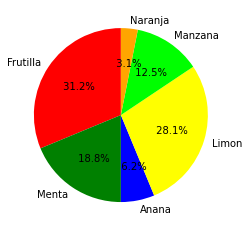

In [6]:
# Parte 2

import matplotlib.pyplot as plt

labels = ('Frutilla', 'Menta', 'Anana', 'Limon', 'Manzana', 'Naranja')
sizes = [10, 6, 2, 9, 4, 1]
colors = ['red', 'green', 'blue', 'yellow', 'lime', 'orange']

plt.pie(sizes, labels=labels, colors=colors, autopct='%5.01f%%', startangle=90)

plt.show()

### Mini desafío 4

Leer el archivo **notas.xlsx** que tiene en el campo **Notas** los puntajes de alumnos en un examen (van de 0 a 10) y armar un histograma con los datos, guardarlo en un archivo **Notas.png**

In [ ]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_4_datos/notas.xlsx"

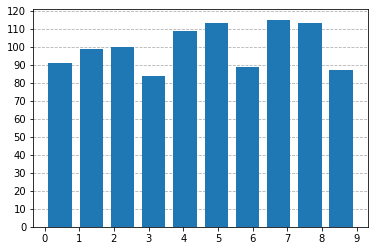

In [ ]:
import pandas as pd

archivo = pd.read_excel("notas.xlsx") 

data = archivo.to_dict("list")

# Con rwidth controlamos el espesor de las barras
# Con zorder elegimos el orden en que se dibujan los elementos gráficos
plt.hist(data["notas"], rwidth=0.75, zorder=2)

# xticks de 1 en 1, yticks de 10 en 10
plt.xticks([x for x in range(0, 10, 1)])
plt.yticks([x for x in range(0, 130, 10)])

# Grilla horizontal, linea punteada, detras del histograma
plt.grid(axis='y', linestyle='--', zorder=1)

plt.savefig('Notas.png')
plt.show()

# **Ejercitación Integradora**
$\newcommand{\dif}{\bigstar}$$\newcommand{\facil}{\color{\green}{\dif}}$ $\newcommand{\pieceofcake}{\color{cyan}{\dif}}$$\newcommand{\medio}{\color{\yellow}{\dif\dif}}$$\newcommand{\media}{\medio}$$\newcommand{\normal}{\medio}$  $\newcommand{\dificil}{\color{\orange}{\dif\dif\dif}}$ $\newcommand{\imposible}{\color{\red}{\dif\dif\dif\dif}}$ 

## $\facil$ Those 3 sides
Escribir una función que dibuje un triangulo equilatero, debe recibir 3 parametros: 


-   X,Y: coordenadas del centro
-   L: Largo de los lados




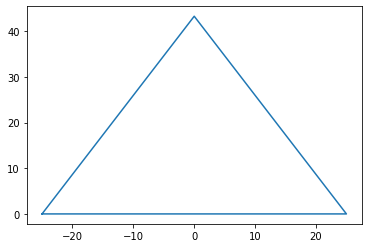

In [ ]:
import matplotlib.pyplot as plt

def plot_triang(x, y, l):
    sin60 = 0.86602540378 #seno de 60 grados
    
    # coordenadas de la esquina izquierda, arriba, derecha
    # repito la izquierda para que se cierre el triangulo
    xcoord = [x-l/2,    0,       x+l/2,   x-l/2]
    ycoord = [0,        l*sin60, 0,       0]
    
    plt.plot(xcoord, ycoord)
    plt.show()
    
    
plot_triang(0, 0, 50)

## $\facil$ Caja y Bigote

Vamos a crear un histograma (visto a comienzo de clase) y un <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html">*Box-and-Whisker plot*</a>. 


<center>
<img src="https://matplotlib.org/_images/sphx_glr_boxplot_demo_pyplot_001.png" height=300 title="Box and Whisker plot ejemplo.">
 </center>
 
 Este tipo de gráfico es comunmente utilizado para mostrar la distribución de una población de forma muy visual.

## Código dado
```
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/NotasFinitos.csv"

import pandas as pd
import matplotlib.pyplot as plt
datos = pd.read_csv("NotasFinitos.csv")
print(datos)
```
## Objetivos

### Procesamiento de datos
Procesar Notas de tres parciales (convertirlas a números). Se debería obtener tres listas con notas del 0-140, una para cada uno de los tres parciales. Tengan cuidado que pandas devuelve las notas en formato `string`!

  Función para ver si un valor es `NaN`
 ```
 def isNaN(num):
    return num != num
 ```
 
 ### Graficar Histograma
 
El histograma debería tener 5 barras **por cada parcial**.
 
 **Intervalos:**
 * Notas entre 0-30
 * Notas entre 31-60
 *  Notas entre 61-90
 * Notas entre 91-120
 * Notas entre 121-140
 
 Esto se puede lograr otorgandole un valor a la propiedad  <a href="https://en.wikipedia.org/wiki/Histogram">`bins` del histograma</a>. 
 
```
plt.hist([parcial1,parcial2,parcial3], bins=intervalos_superiores ,label=nombreDeDatasets)
```

  ### Graficar Box-and-Whisker plot
 Graficar el *box-and-whisker plot*
 
 ```
 plt.boxplot([notasParcial1, notasParcial2, notasParcial3])
 ```

 
 
 **Datos y Tips**
 
 * Las notas pueden contener los siguientes valores:
  * `0-140` : Nota numérica
  * `'Ausente'` : Indica ausencia al parcial
  * `'NaN'` : El alumno no cumplio condiciones para rendir parcial (celda vacia)
 
 * Descartar los valores no-numéricos (Ausente y NaN)
 
 * Usar $\mathrm{int()}$ para convertir valores numericos de `string` a `int`!


--2020-11-02 15:23:40--  https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/NotasFinitos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 547 [text/plain]
Saving to: ‘NotasFinitos.csv’

NotasFinitos.csv    100%[===================>]     547  --.-KB/s    in 0s      

2020-11-02 15:23:40 (30.5 MB/s) - ‘NotasFinitos.csv’ saved [547/547]



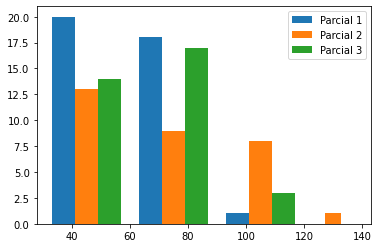

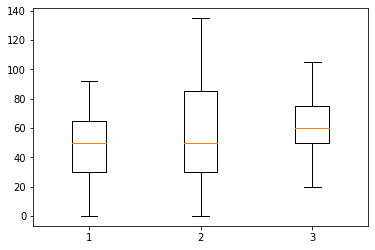

In [ ]:
def numeralizar(datos):
  datosNumeralizados=[]
  for i in range(len(datos)):
    dato = datos[i]
    if dato!=dato:
      continue
    elif dato=='Ausente':
      continue
    else:
        datosNumeralizados.append(int(dato))
  return datosNumeralizados


! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/NotasFinitos.csv"

import pandas as pd
import matplotlib.pyplot as plt
datos = pd.read_csv("NotasFinitos.csv") 

notas1 = datos['1P']
notas2 = datos['2P']
notas3 = datos['3P']

parcial1=numeralizar(notas1)
parcial2=numeralizar(notas2)
parcial3=numeralizar(notas3)


intervalos_superiores=[30,60,90,120,140]
nombreDeDatasets=['Parcial 1','Parcial 2','Parcial 3']
plt.hist([parcial1,parcial2,parcial3], bins=intervalos_superiores ,label=nombreDeDatasets)
plt.legend(loc="upper right")
plt.show()

_=plt.boxplot([parcial1,parcial2,parcial3]) 
# ax1.show()


## $\facil$ Análisis en las redes
Se pide graficar en función del tiempo la cantidad de vistas, minutos vistos, likes, y subscriptores ganados de un canal de Youtube. Además, se debe indicar cuándo se produjo el mayor *incremento* de un día hacia otro para cada variable mencionada.

Los datos **reales** se encuentran en un archivo *JSON* obtenido mediante la API de YouTube para el [Canal de YouTube de IEEE-ITBA](https://www.youtube.com/channel/UCpWHvOSiPtDIwIw8Tb_9g6A/featured).

Para convertir la información en el archivo a estructuras de datos conocidas se puede emplear el siguiente código:
```python
import json
json_file = open('youtube_data.json')
data = json.load(json_file)
```

**Tips:**
- Para mostrar las fechas sin que se superpongan, se puede usar `fig, ax = plt.subplots(1)` antes de comenzar a graficar, para luego usar `fig.autofmt_xdate()`. Otra alternativa es rotar el texto con `plt.xticks(rotation=90)`
- Pueden buscar en internet todo lo que necesiten! Si necesitan realizar cierta tarea que no fue explicada en esta clase pueden encontrar muchas respuestas investigando.






In [ ]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_4_datos/youtube_data.json"

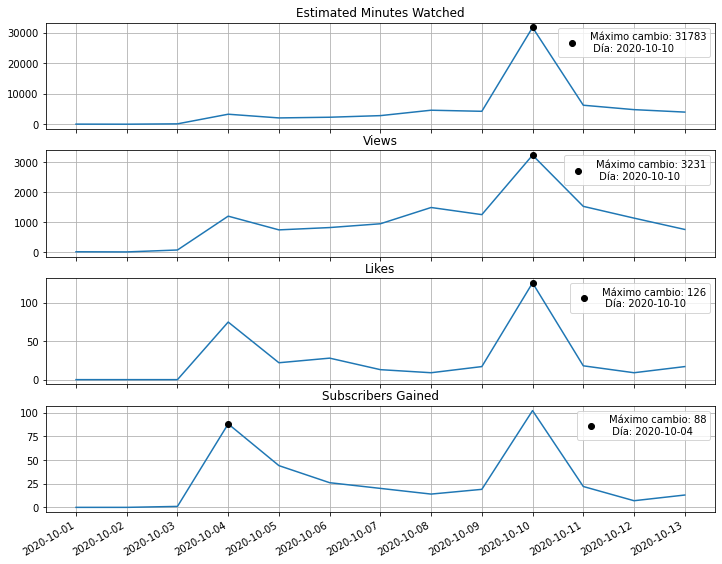

In [ ]:
import json
import matplotlib.pyplot as plt

json_file = open('youtube_data.json')
data = json.load(json_file)

day = []
emw = []
views = []
likes = []
subs = []

# Organizo la información
for day_info in data['rows']:
  day.append(day_info[0])
  emw.append(day_info[1])
  views.append(day_info[2])
  likes.append(day_info[3])
  subs.append(day_info[4])

# Determino el cambio diario
emw_change = [emw[i] - emw[i-1] for i in range(1, len(emw))]
views_change = [views[i] - views[i-1] for i in range(1, len(views))]
likes_change = [likes[i] - likes[i-1] for i in range(1, len(likes))]
subs_change = [subs[i] - subs[i-1] for i in range(1, len(subs))]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12, 10))

ax1.plot(day, emw)
i = emw_change.index( max(emw_change) ) + 1  # Máximo cambio
ax1.plot(day[i], emw[i], 'ko', label = 'Máximo cambio: {}\n Día: {}'.format(emw[i],day[i]))
ax1.set_title('Estimated Minutes Watched')
ax1.grid()
ax1.legend()

ax2.plot(day, views)
i = views_change.index( max(views_change) ) + 1
ax2.plot(day[i], views[i], 'ko', label = 'Máximo cambio: {}\n Día: {}'.format(views[i],day[i]))
ax2.set_title('Views')
ax2.grid()
ax2.legend()

ax3.plot(day, likes)
i = likes_change.index( max(likes_change) ) + 1
ax3.plot(day[i], likes[i], 'ko', label = 'Máximo cambio: {}\n Día: {}'.format(likes[i],day[i]))
ax3.set_title('Likes')
ax3.grid()
ax3.legend()

ax4.plot(day, subs)
i = subs_change.index( max(subs_change) ) + 1
ax4.plot(day[i], subs[i], 'ko', label = 'Máximo cambio: {}\n Día: {}'.format(subs[i],day[i]))
ax4.set_title('Subscribers Gained')
ax4.grid()
ax4.legend()

fig.autofmt_xdate()
plt.show()

## $\medio$ Venta de pasajes
Python Airlines es la nueva low-cost en el mercado. Parece que todo el mundo quiere volar en esta aerolínea, pero la cantidad de asientos es limitada y la aerolínea no puede comprar nuevos aviones fácilmente. El departamento de ventas tuvo una gran idea, observaron que algunos de viajeros no se presentan para abordar el vuelo, así que van a vender más pasajes que la cantidad de asientos disponibles y confiar en que suficientes pasajeros no se presenten en el aeropuerto como para no tener que impedir el ingreso de pasajeros al avión.

Las características de los vuelos son los siguientes:

- La aerolínea tiene como ganancia neta \\$400 por pasaje vendido, independientemente de que se presente el pasajero.

- Si la cantidad de pasajeros que se presentan es mayor a la cantidad de asientos, la aerolínea debe gastar \\$600 por pasajero extra para poder ofrecer un hotel y una compensación.

- Cada pasajero tiene una probabilidad del 95% de presentarse en el aeropuerto para tomar el vuelo.

- Cada avión tiene capacidad para 222 pasajeros.

Simular 1000 vuelos en los cuales se vendieron exactamente 250 pasajes. Calcular la ganancia neta promedio que se obtiene vendiendo esta cantidad de pasajes (la venta de pasajes siempre produce la misma ganancia, y se debe restar la pérdida por compensación que depende de la cantidad de pasajeros que se presenten).

Repetir el cálculo de la ganancia promedio para distinta cantidad de pasajes vendidos, entre un rango de 222 y 250. Graficar la ganancia promedio en función de la cantidad de pasajes vendidos y mostrar el punto de máxima ganancia.

**Tip:**
- Se puede usar [np.random.rand()](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.rand.html#numpy.random.rand) < 0.95 para determinar si cierto pasajero se presenta o no.
- Usando mi_lista.index( max(mi_lista) ) se obtiene primero el valor máximo de una lista, y luego se busca el índice en el cual aparece ese valor. De esta forma obtenemos el índice de la lista en el cual se encuentra el valor máximo.

Al vender 235 pasajes, se espera ganar: $ 92745.4


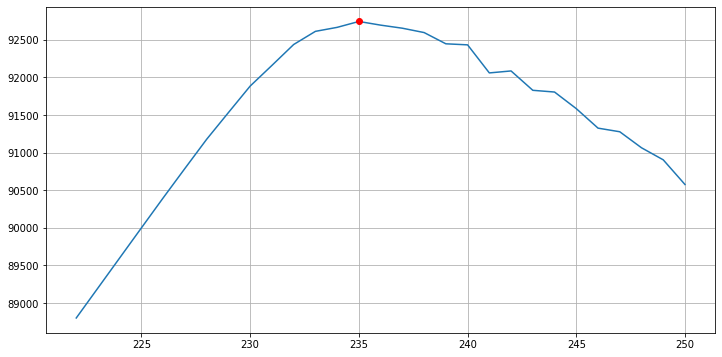

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

vendidos = []
ganancias = []

# v es la cantidad de pasajes vendidos
for v in range(222, 251):
  promedio = 0

  # i es el indice de cada simulacion
  for i in range(1000):
    presentes = 0
    for p in range(v):
      if np.random.rand() < 0.95:  # Determino si la persona p esta presente
        presentes += 1
    if presentes <= 222:
      promedio += v*400    # Venta del pasaje
    else:
      promedio += v*400 - (presentes-222)*600   # Venta menos compensación
  promedio /= 1000
  ganancias.append(promedio)
  vendidos.append(v)

# Imprimo el valor máximo
imax = ganancias.index(max(ganancias))
print("Al vender", vendidos[imax], "pasajes, se espera ganar: $", ganancias[imax])

plt.figure(figsize=(12, 6))
plt.plot(vendidos, ganancias)
plt.plot(vendidos[imax], ganancias[imax], 'ro')   # Muestro el valor máximo
plt.grid()
plt.show()

## $\normal$ Demografía en Argentina

Se pide visualizar la distribución etaria de la población, para ello se cuenta con la información de 2019 en el archivo *PopulationArgentina2019.csv* en el cual se detalla para cada rango de edades, el número de individuos de sexo femenino y de sexo masculino en el rango. La primer columna '*Age*' tiene los valores '*0-4*', '*5-9*', '*10-14*', '*15-20*', etc. hasta '*100+*' para cada rango de edades. Las siguientes dos columnas son '*M*' y '*F*', contienen el número de hombres y de mujeres en la población respectivamente. Se deben mostrar un *grafico de barras* para hombres y uno para mujeres, mostrando los rangos de edad en el eje horizontal y el **porcentaje** con respecto a la población total en el eje vertical.

**Tip:** Usar [plt.bar(x, height)](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.bar.html) para crear gráficos de barra, el resultado debería asemejarse a la siguiente imagen:

<img src="https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/_assets/DistribucionEtariaArg.png" height=300>

Fuentes: https://www.populationpyramid.net/sources

In [ ]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_4_datos/PopulationArgentina2019.csv"

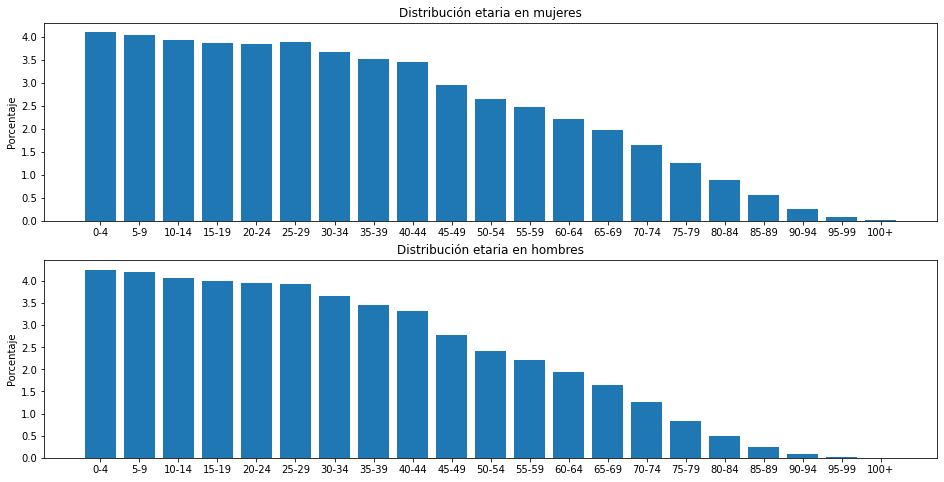

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

archivo = pd.read_csv("PopulationArgentina2019.csv")
datos = archivo.to_dict('list')
Age = datos['Age']
M = datos['M']
F = datos['F']

total = sum(M) + sum(F)
M_porcentual = [ 100* i/total for i in M ]
F_porcentual = [ 100* i/total for i in F ]

plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
plt.title('Distribución etaria en mujeres')
plt.bar(Age, F_porcentual)
plt.ylabel('Porcentaje')

plt.subplot(2, 1, 2)
plt.title('Distribución etaria en hombres')
plt.bar(Age, M_porcentual)
plt.ylabel('Porcentaje')
plt.show()

## $\normal$ Bug Catcher y el disco de la Eutrofia 
* **Atención**: Este problema asume algunos conocimientos básicos de análisis mátematico

Pasaron 10 años desde que se concretó un acuerdo para la construcción de una fabrica de queso al lado del Lago Nahuel Huapi, a dos kilometros de la ciudad natal de *Bug Catcher*. *Bug Catcher* dice que en ese tiempo el agua del lago ha visto un deterioro en su calidad y esta peticionando ante la ciudad la imposición de regulaciones más estrictas sobre los efluentes de la fabrica.

Pero primero tiene que demostrar este deterioro... *Y así,* Bug Catcher *ha venido a tí para pedirte ayuda graficando los resultados de un estudio de agua.*

$\newcommand{\zf}{{z_{\mathrm{f}}}}$

---


<center>
<img src="https://cdn.bulbagarden.net/upload/archive/3/3f/20091012043640%21Spr_RG_Bug_Catcher.png" height=200 title="I catch bugs and stop global conglomerates from getting away with enviromental crimes." ></center>


---


**El estudio**

Se efectua un estudio de <a href="https://en.wikipedia.org/wiki/Trophic_state_index#Eutrophic">turbiedad</a> de agua del tipo <a href="https://en.wikipedia.org/wiki/Secchi_disk">*Secchi*</a> . El estudio consiste en hundir un disco blanco en el cuerpo de agua a estudiar y medir la profundidad $\zf$  a la cual el disco desaparece. Para el estudio se tiene que tener en cuenta la intensidad de la luz sobre el cuerpo de agua $I_0$.



**El problema**

*Bug Catcher* quiere un gráfico que muestre la turbiedad del lago Nahuel Huapi y compararlo a la de otro lago cercano <a href="https://es.wikipedia.org/wiki/Anexo:Definiciones_usuales_en_hidrolog%C3%ADa#Aguas_arriba">*río arriba*</a>. 

**Objetivo**

Graficar la intensidad de luz $I_z$ en el eje vertical a una profundidad $z$ ($z$ en el eje horizontal) para el Nahuel Huapi y el otro lago. 

**Datos**

Rige la ley de <a href="https://en.wikipedia.org/wiki/Beer%E2%80%93Lambert_law">Beer-Lambert</a>:
$$\frac{I_{z}}{I_{0}}=e^{-k z}$$
donde 
* $I_z$ es la intensidad de luz a una profundidad $z$
* $I_0$ es la intensidad de luz sobre la superficie del agua, para un día soleado $I_0\approx 700\  \mathrm{W/m}^2$
* $k$ es el factor de atenuación del agua. Indica turbiedad.

Sabemos que el disco <a href="https://en.wikipedia.org/wiki/Secchi_disk">*Secchi*</a>  de *Bug Catcher* desaparece bajo **56cm** de agua del Nahuel Huapi.  **Para todos los cálculos suponga que la relación** $\frac{I_\zf}{I_0}$ **vale** $10\%$ (para la profundidad a la cual desaparece el disco).

El factor de atenuación del lago *río arriba* fue medido la semana pasada y vale $k_{\mathrm{ra}}=0,009\ \mathrm{cm}^{-1}$.

**Tips:**

* Hay que despejar $k$ y calcularla para el lago Nahuel Huapi antes de graficar
* la función `log` de la libreria `math` es el logaritmo natural
* Pruebe graficar ambas curvas hasta la profundidad $\zf$ del lago río arriba
* **Tener una bolígrafo y un cuaderno abierto ayuda.**

Nahuel Huapi k= 0.04111759094632224
Rio Arriba k= 0.009


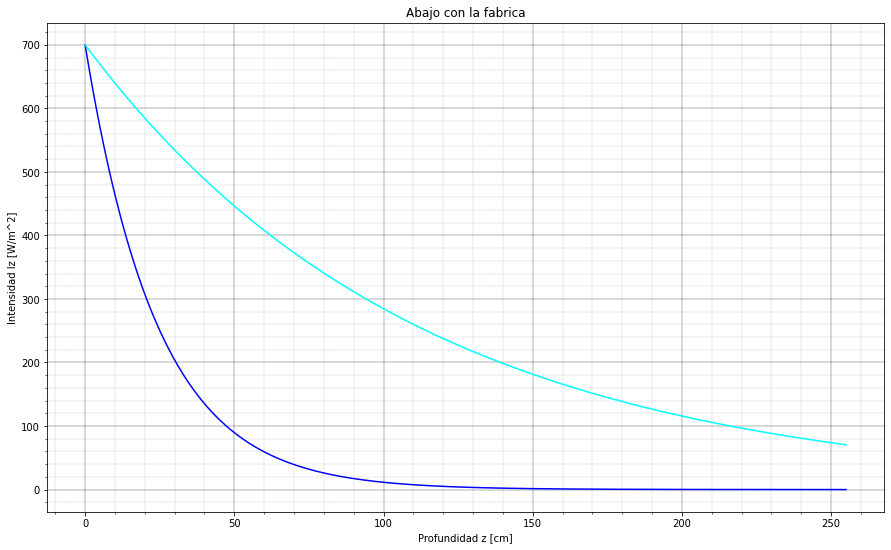

In [1]:
import numpy as np
import matplotlib.pyplot as plt
IzIo=0.1
zfNahuel = 56

# despeje (formula)
kNahuel=-np.log(IzIo)/zfNahuel
kRioArriba = 0.009

#despeje (formula)
zfRioArriba = -np.log(IzIo)/kRioArriba

print('Nahuel Huapi k=',kNahuel)
print('Rio Arriba k=',kRioArriba)

# valores de z a gráficar
z = np.arange(0,zfRioArriba,1)

I0= 700

# valores a gráficar
IzNahuel = I0*np.e**(-kNahuel*z)
IzRioArriba = I0*np.e**(-kRioArriba*z)

plt.figure(figsize=(15,9))
plt.plot(z, IzNahuel, "blue",label="Nahuel Huapi")
plt.plot(z, IzRioArriba, "cyan",label="Río arriba")
plt.ylabel("Intensidad Iz [W/m^2]")
plt.xlabel("Profundidad z [cm]")

plt.title("Abajo con la fabrica")
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.2, color='black')
#Le asignamos el estilo a la grilla mayor
plt.grid(which='major', linestyle='-', linewidth=0.3, color='black')


## $\normal$ Las Algas del Nahuel Huapi (Bug Catcher Continuado)

*Bug Catcher* ha <a href="https://link.springer.com/article/10.1007/BF00041459">encontrado un paper</a> sobre el crecimiento de algas en relación a la intensidad de luz. No entiende los gráficos del paper (porque no estan hechos en Python) pero llega a leer:

* Debajo de una intensidad de $3\%$ de la del sol ($I_0$) el crecimiento de las algas disminuye rapidamente

* entre $3\%$ y $25\%$ las algas crecen bien.

**Objetivo**

Mostrar rango de profundidad a la cual las algas podrían sobrevivir en el Nahuel Huapi en $\color{green}{\textsf{verde}}$ y la zona a partir de la cual sufren en $\color{red}{\textsf{rojo}}$.

**Tips:**
* $\% I_0=\frac{I_{z}}{I_{0}}=e^{-k z}\quad \longrightarrow \quad z = -\frac{\ln(\% I_0)}{k}$  
* Funcion coloreado debajo la curva: `plt.fill_between(zbien, Izbien, color="green",label="Crecimiento bueno")`

**Bonus**

¿Cómo se ve afectada la zona donde sobreviven las algas al modificar el parametro $k$?

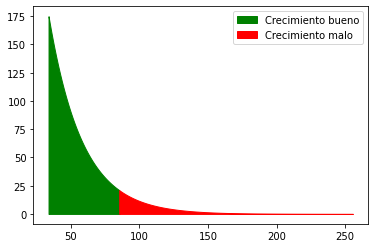

In [2]:
## BUG CATCHER:Algas CONTINUED
Izsuperior = 0.25
Izinferior = 0.03
zinferior= -np.log(Izsuperior)/kNahuel
zsuperior = -np.log(Izinferior)/kNahuel

zbien  = np.arange(zinferior,zsuperior,0.2)
zmal =np.arange(zsuperior,zfRioArriba,0.2) 

Izbien = I0*np.e**(-kNahuel*zbien) 
Izmal = I0*np.e**(-kNahuel*zmal)
plt.fill_between(zbien, Izbien, color="green",label="Crecimiento bueno")

plt.fill_between(zmal, Izmal,color="red",label="Crecimiento malo")
plt.legend(loc="upper right")
plt.show()

## $\dificil$ Esos Malditos Mecánicos...
**Intro**

Volodymyr es un profesor de la materia **Elementos Finitos I** en el ITBA. El <a href="https://en.wikipedia.org/wiki/Finite_element_method">método de los elementos finitos</a> consiste en modelar sistemas de solidos o fluidos mediante una partición del sistema en subsistemas que se resuelven en conjunto según condiciones de borde y condiciones iniciales. 

**Problema**

El segundo cuatrimestre del 2018 Volodymyr tomó 3 parciales y ahora quiere obtener estadisticas y además saber cuales alumnos aprobaron y cuales no. El archivo `NotasFinitos.csv` contiene los datos **reales** de dicha materia sin los nombres de los alumnos. 



---
<center>
<img src="https://grupocarman.com/blog/wp-content/uploads/2014/10/Mallado-por-elementos-finitos.png" title="Un modelo de un motor. En rojo las partes más comprometidas por fuerzas." height=200>
  
  ***La resolución correcta de este ejercicio indica que el programador tiene un solido conocimiento del manejo de datos y estructuras de control.***
</center>

---


**Objetivos**

Del archivo `"https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/NotasFinitos.csv"` : 

* Obtener promedios para cada parcial
* Obtener promedio para toda la cursada
* Obtener promedios de de los que aprobaron la materia, para cada parcial.


***Condiciones de Borde***

* Condición de aprobación de parcial:   `Nota>=60`

* Para aprobar la materia se necesita aprobar 2 parciales y sumar entre los tres parciales: `sumaNotas>=160` 

* Las notas pueden contener los siguientes valores:
  * `0-140` : Nota numérica
  * `'Ausente'` : Indica ausencia al parcial
  * `'NaN'` : El alumno no cumplio condiciones para rendir parcial (celda vacia)

* Tomar los valores `Ausente` y `NaN` como `0`. Usar la función $\mathrm{isNaN}$ en el código de arriba

**Tips:**
* Las funciones pueden ser muy utiles para este ejercicio! 

* Convertir la nota de `string` a `int` usando la función $\mathrm{int}(Nota)$

* ***hint:*** Hay `49` alumnos de los cuales `19` aprobaron la materia según el criterio dado


In [ ]:
def isNaN(num):
    return num != num

def getNota(estado):
  if estado == 'Ausente':
    return 0
  if isNaN(estado):
    return 0
  return int(estado)
  
def Aprobado(parcial1,parcial2,parcial3):
  if parcial1+parcial2+parcial3<160:
    return False
  if parcial1>=60 and parcial2>=60:
    return True
  elif parcial1>=60 and parcial3>=60:
    return True
  elif parcial2>=60 and parcial3>=60:
    return True
  else:
    return False

! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/NotasFinitos.csv"

import pandas as pd
datos = pd.read_csv("NotasFinitos.csv") 

# usamos funciones de pandas (es decir no usamos to_dict, se podría resolver también usando to_dict)

notas1 = datos['1P']
notas2 = datos['2P']
notas3 = datos['3P']
N = len(notas1) # La cantidad de alumnos notasNumericas
# print(notas1[N-1])
sum1=0
sum2=0
sum3=0
sumAprobados1=0
sumAprobados2=0
sumAprobados3=0
alumnosAprobados=0
for i in range(len(notas1)):
  nota1 = getNota(notas1[i])
  nota2 = getNota(notas2[i])
  nota3 = getNota(notas3[i])
  sum1 += nota1
  sum2 += nota2
  sum3 += nota3
  
  estáAprobado = Aprobado(nota1,nota2,nota3)
  if estáAprobado:
    alumnosAprobados += 1
    sumAprobados1    += nota1
    sumAprobados2    += nota2
    sumAprobados3    += nota3
    
prom1 = sum1/N
prom2 = sum2/N
prom3 = sum3/N
  
promAprobados1 = sumAprobados1/alumnosAprobados
promAprobados2 = sumAprobados2/alumnosAprobados
promAprobados3 = sumAprobados3/alumnosAprobados
print('Cantidad alumnos:',N, '  Cantidad alumnos aprobados:',alumnosAprobados)
print('Promedios para parciales: P1=',prom1,'P2=',prom2,'P3=',prom3)
print('Promedios de los aprobados: P1=',promAprobados1 ,'P2=',promAprobados2,'P3=',promAprobados3 )


--2020-11-02 15:31:50--  https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/NotasFinitos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 547 [text/plain]
Saving to: ‘NotasFinitos.csv.1’

NotasFinitos.csv.1  100%[===================>]     547  --.-KB/s    in 0s      

2020-11-02 15:31:50 (30.8 MB/s) - ‘NotasFinitos.csv.1’ saved [547/547]

Cantidad alumnos: 49   Cantidad alumnos aprobados: 19
Promedios para parciales: P1= 46.795918367346935 P2= 45.816326530612244 P3= 44.183673469387756
Promedios de los aprobados: P1= 59.89473684210526 P2= 85.26315789473684 P3= 64.47368421052632
